In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pyexpat import features

from scipy.stats import alpha

url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_matches_2024.csv"
df = pd.read_csv(url, encoding="utf-8")




In [2]:
print(f"ROWS: {df.shape[0]} | COLS {df.shape[1]}")
df.head()

ROWS: 3076 | COLS 49


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [4]:
df.isnull().sum()


tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1782
winner_entry          2599
winner_name              0
winner_hand              0
winner_ht               19
winner_ioc               0
winner_age               1
loser_id                 0
loser_seed            2319
loser_entry           2358
loser_name               0
loser_hand               0
loser_ht                50
loser_ioc                0
loser_age                1
score                    0
best_of                  0
round                    0
minutes                238
w_ace                   60
w_df                    60
w_svpt                  60
w_1stIn                 60
w_1stWon                60
w_2ndWon                60
w_SvGms                 61
w_bpSaved               60
w_bpFaced               60
l_ace                   60
l

In [5]:
df = df.drop(columns=['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry'])


In [6]:
max_missing_percent = df.isnull().sum().max() / df.shape[0] * 100
print("Максимальный процент пропущенных данных:", max_missing_percent)

if max_missing_percent < 5:
    print("Пропущенные данные можно пренебречь")
else:
    print("Пропущенные данные следует учесть")

Максимальный процент пропущенных данных: 7.737321196358908
Пропущенные данные следует учесть


Приведем по среднему времени матча взяв количество сетов

In [7]:
df[df['minutes'].isnull() == True]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
575,2024-0495,Dubai,Hard,32,A,20240226,298,122330,Alexander Bublik,R,...,67.0,49.0,21.0,17.0,1.0,4.0,23.0,1699.0,5.0,5110.0
1061,2024-1536,Madrid Masters,Clay,128,M,20240422,297,200000,Felix Auger Aliassime,R,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,1240.0,2.0,8660.0
1302,2024-520,Roland Garros,Clay,128,G,20240527,401,207989,Carlos Alcaraz,R,...,97.0,61.0,12.0,22.0,7.0,16.0,3.0,7300.0,4.0,6305.0
1303,2024-520,Roland Garros,Clay,128,G,20240527,400,207989,Carlos Alcaraz,R,...,76.0,56.0,27.0,22.0,8.0,14.0,3.0,7300.0,2.0,8770.0
1304,2024-520,Roland Garros,Clay,128,G,20240527,399,100644,Alexander Zverev,R,...,71.0,49.0,14.0,17.0,7.0,12.0,4.0,6305.0,7.0,4425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2024-M-DC-2024-WG1-M-SWE-IND-01,Davis Cup WG1 R1: SWE vs IND,Hard,4,D,20240914,4,111200,Elias Ymer,R,...,NaN,NaN,NaN,NaN,NaN,NaN,238.0,241.0,588.0,57.0
2952,2024-M-DC-2024-WG1-M-TPE-BIH-01,Davis Cup WG1 R1: TPE vs BIH,Hard,4,D,20240914,1,105806,Mirza Basic,R,...,NaN,NaN,NaN,NaN,NaN,NaN,579.0,59.0,121.0,489.0
2953,2024-M-DC-2024-WG1-M-TPE-BIH-01,Davis Cup WG1 R1: TPE vs BIH,Hard,4,D,20240914,2,126555,Tung Lin Wu,R,...,NaN,NaN,NaN,NaN,NaN,NaN,318.0,164.0,86.0,655.0
2954,2024-M-DC-2024-WG1-M-TPE-BIH-01,Davis Cup WG1 R1: TPE vs BIH,Hard,4,D,20240914,4,106000,Damir Dzumhur,R,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,655.0,121.0,489.0


In [8]:
# заменяем пропущенные значения Длительность матча на среднее

avg_minutes = df[df['minutes'].isnull() == False][["best_of", "minutes"]]
match_rounds = df.best_of.unique()

# среднее количество минут при 5 и 3-х сетовом матче
avg_minutes = avg_minutes.groupby("best_of")['minutes'].apply(np.average).round(2)

# подставляем эти данные в датасет
# Дропаем эти данные поскольку матч не состоялся!

df = df.drop(index=df.loc[(df['minutes'] == False)].index)

df


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,Grigor Dimitrov,R,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,Holger Rune,R,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,Grigor Dimitrov,R,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,Holger Rune,R,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,Roman Safiullin,R,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,Joaquin Aguilar Cardozo,U,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
3072,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,Nam Hoang Ly,R,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
3073,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,Kris Van Wyk,R,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
3074,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,Nam Hoang Ly,R,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


In [53]:
features = ["minutes", "winner_ht", "winner_age", "w_ace", "w_df", "w_svpt", "w_bpSaved", "w_bpFaced","loser_ht", "loser_age", "l_ace", "l_df", "l_svpt", "l_bpSaved", "l_bpFaced" ]

df1 = df.loc[:, features]
df1

,minutes,winner_ht,winner_age,w_ace,w_df,w_svpt,w_bpSaved,w_bpFaced,loser_ht,loser_age,l_ace,l_df,l_svpt,l_bpSaved,l_bpFaced
0,136.0,191.0,32.6,8.0,2.0,74.0,3.0,3.0,188.0,20.6,9.0,3.0,95.0,8.0,9.0
1,97.0,188.0,20.6,7.0,4.0,72.0,1.0,2.0,185.0,26.4,5.0,5.0,66.0,5.0,7.0
2,109.0,191.0,32.6,10.0,3.0,67.0,6.0,6.0,183.0,29.7,5.0,1.0,62.0,5.0,7.0
3,105.0,188.0,20.6,13.0,0.0,65.0,1.0,1.0,183.0,31.9,5.0,2.0,77.0,3.0,5.0
4,120.0,185.0,26.4,9.0,3.0,73.0,2.0,3.0,185.0,22.8,3.0,2.0,69.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,77.0,NaN,18.8,0.0,0.0,36.0,1.0,1.0,188.0,21.8,1.0,1.0,61.0,8.0,14.0
3072,131.0,175.0,26.9,1.0,1.0,86.0,8.0,9.0,NaN,23.2,2.0,1.0,56.0,1.0,4.0
3073,131.0,185.0,27.3,4.0,2.0,76.0,6.0,11.0,183.0,26.4,0.0,2.0,71.0,5.0,12.0
3074,159.0,175.0,26.9,0.0,1.0,84.0,2.0,5.0,185.0,27.3,5.0,3.0,86.0,5.0,9.0


построим гистограммы

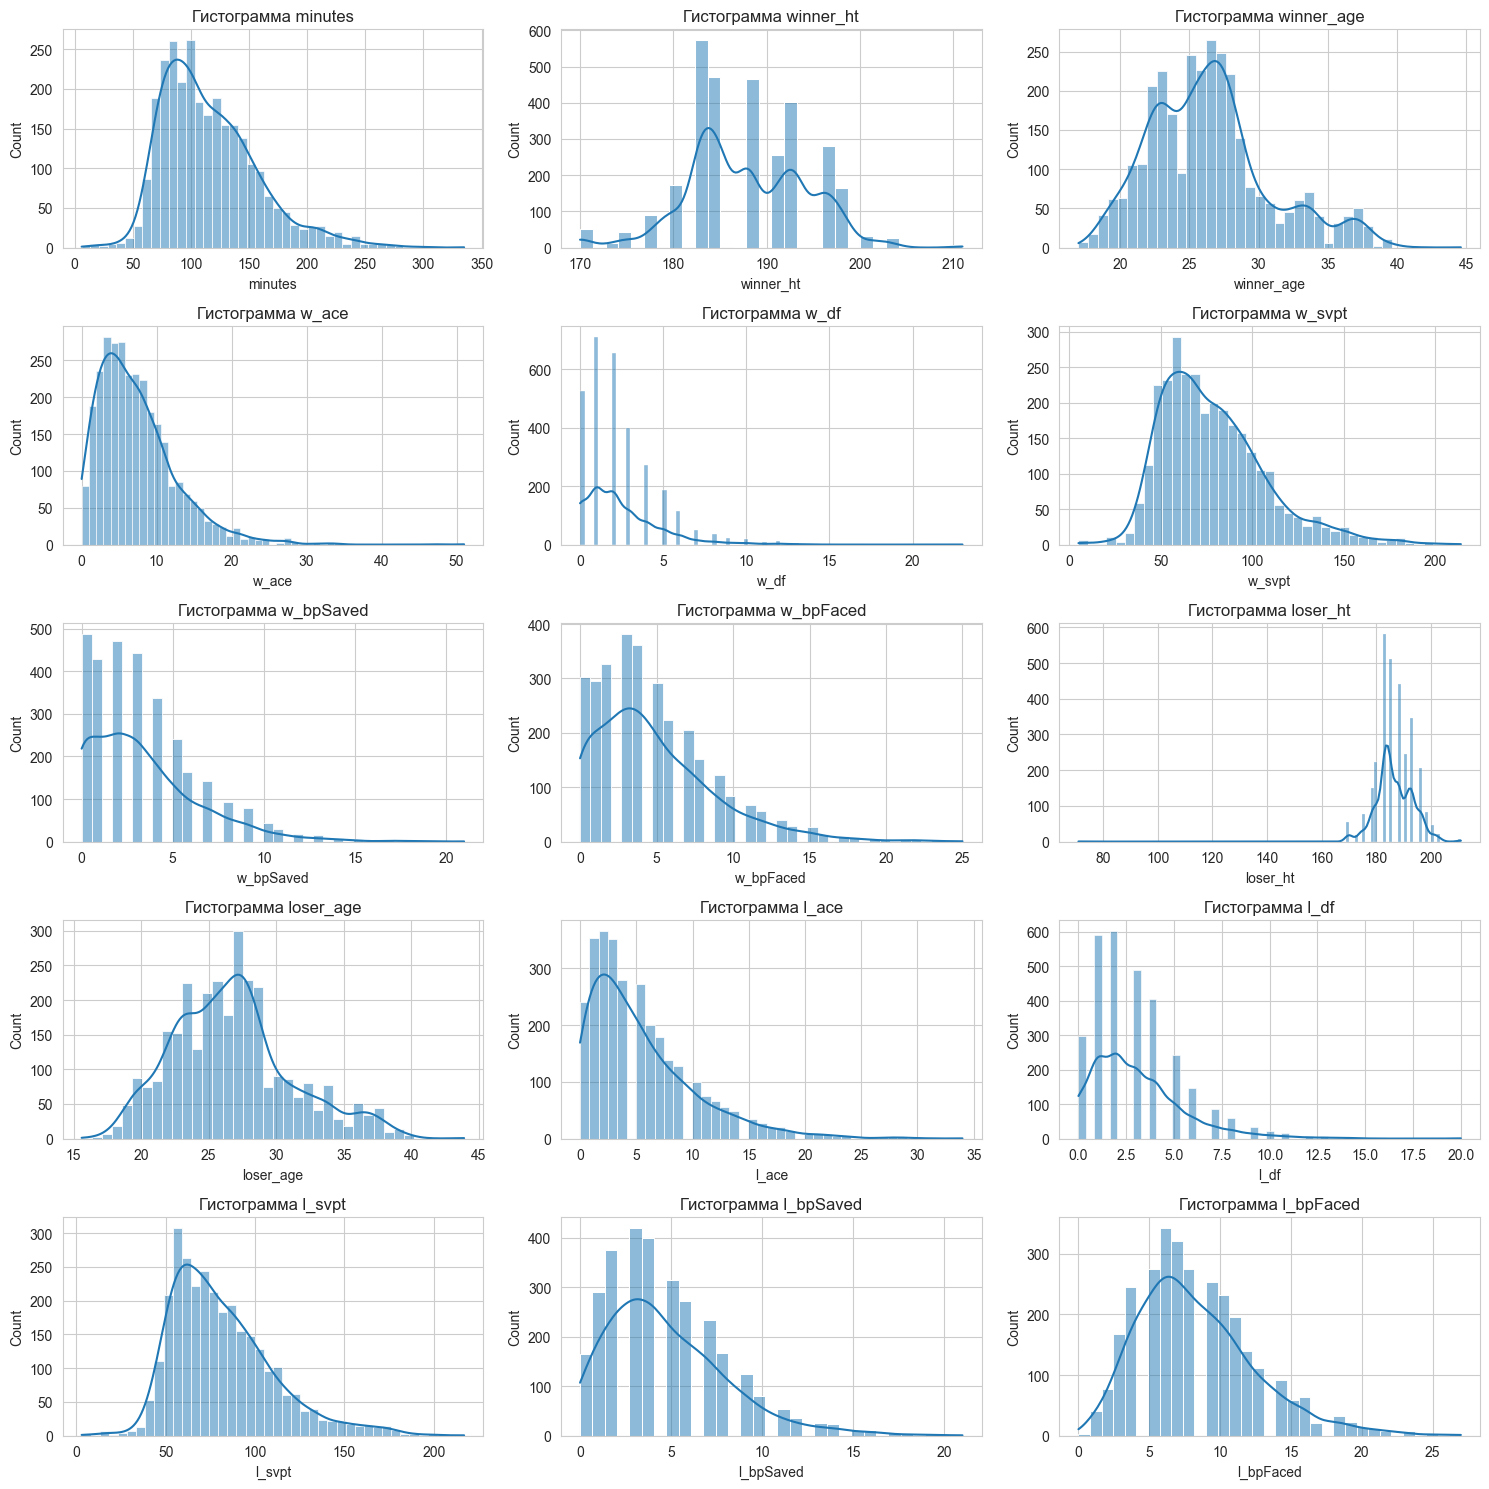

In [54]:
# Гистограммы
plt.figure(figsize=(15, 15))
rows = (len(features) + 2) // 3
for i, col in enumerate(features):
    plt.subplot(rows, 3, i+1)
    sns.histplot(df1[col].dropna(), kde=True)
    plt.title(f'Гистограмма {col}')
plt.tight_layout()
plt.show()


In [55]:
df_country_count = df.groupby('winner_ioc').size().reset_index(name="qty_players")
df_country_count[df_country_count['qty_players'] > 20].sort_values('qty_players', ascending=False)




,winner_ioc,qty_players
70,USA,361
36,ITA,287
24,FRA,261
1,AUS,211
21,ESP,183
58,RUS,168
0,ARG,165
27,GER,158
60,SRB,99
15,CZE,89


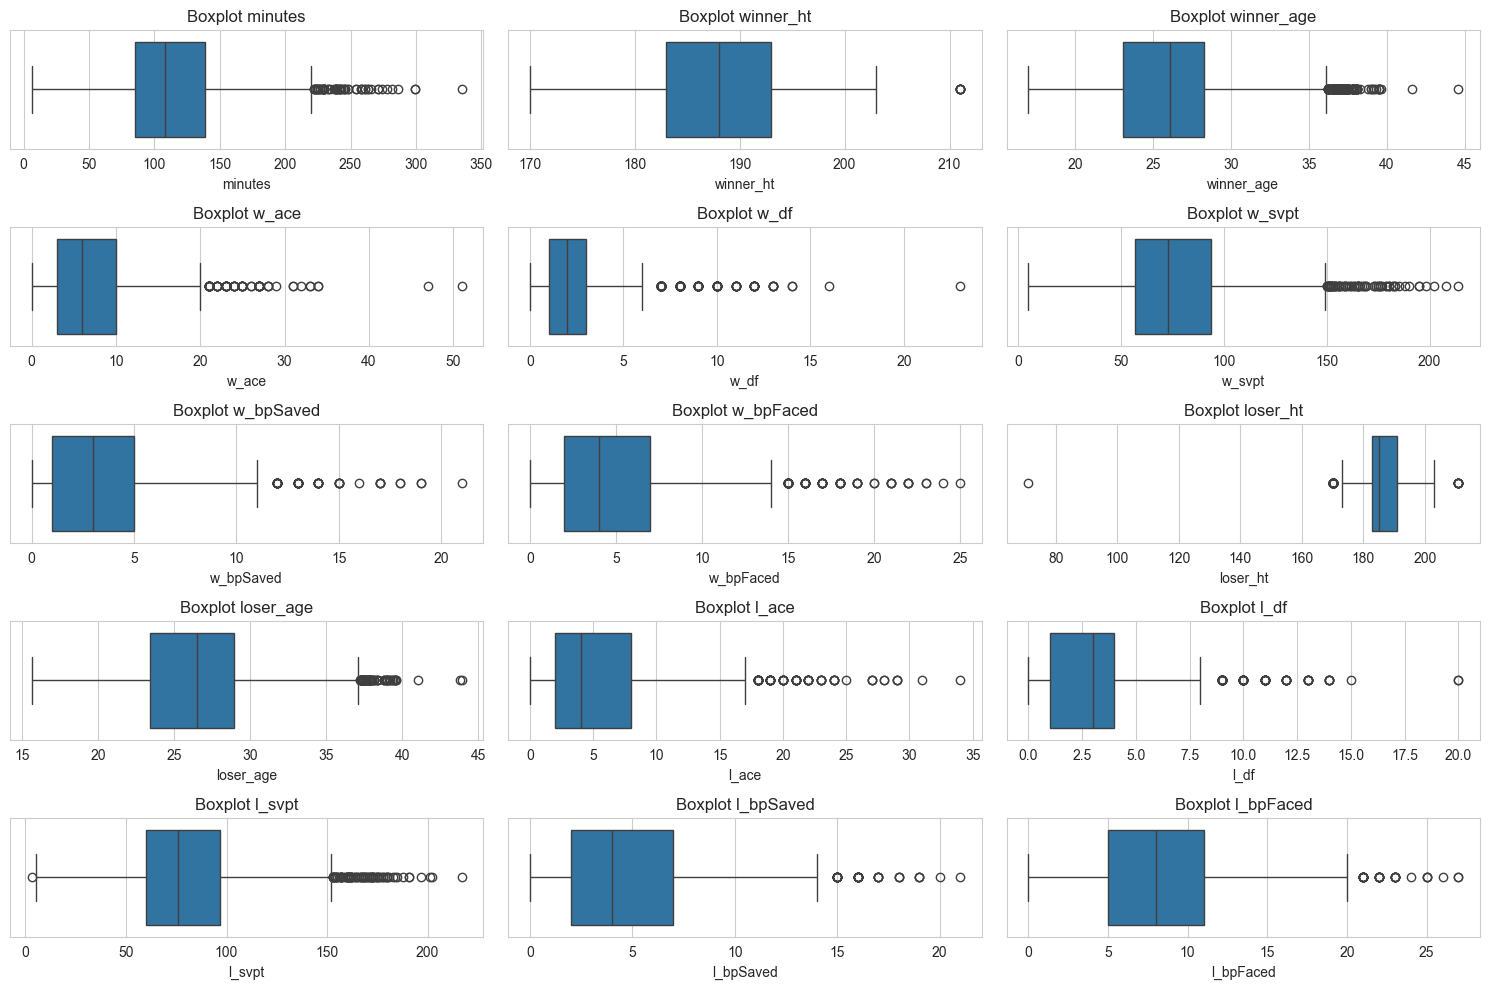

In [56]:
# Boxplot для выявления выбросов
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

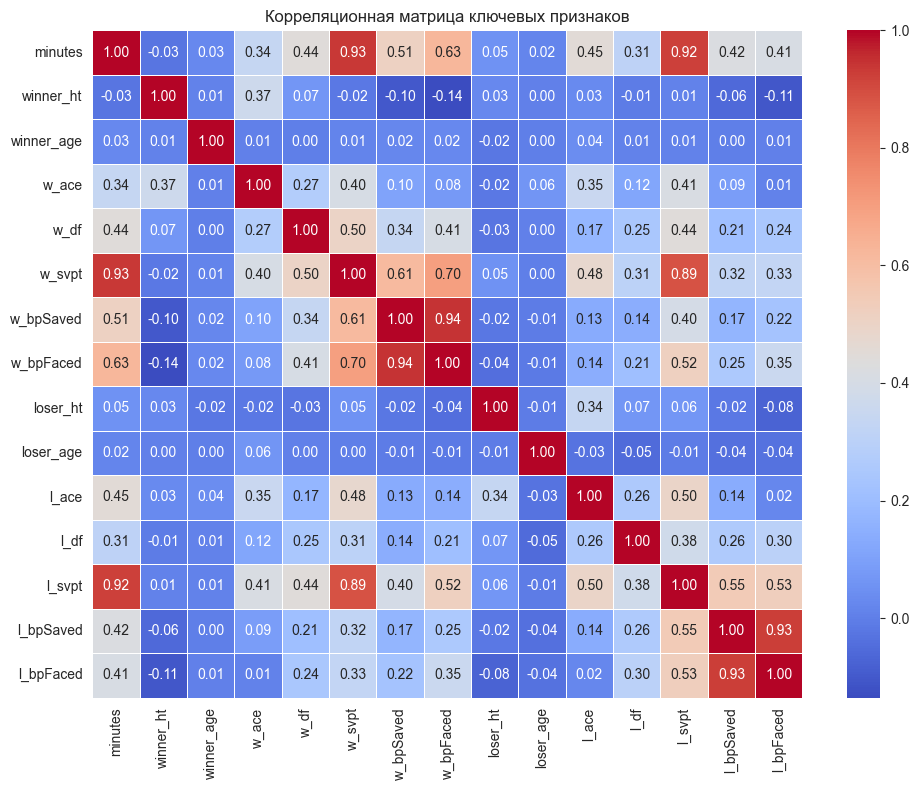

In [58]:
# Корреляционная матрица и её визуализация
corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица ключевых признаков')
plt.tight_layout()
plt.show()